In [2]:
import numpy as np
import pandas as pd
from keras import models, layers

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import json
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('../data/datasets/training_data_small_track.csv')
print(f'{df.shape=}')
df.sample(5)

df.shape=(2030, 19)


,steering_angle,waypoint1_lat,waypoint1_lon,waypoint2_lat,waypoint2_lon,waypoint3_lat,waypoint3_lon,waypoint4_lat,waypoint4_lon,waypoint5_lat,waypoint5_lon,waypoint6_lat,waypoint6_lon,waypoint7_lat,waypoint7_lon,waypoint8_lat,waypoint8_lon,waypoint9_lat,waypoint9_lon
1684,0.0,-0.799670,-1.500161,-2.398991,-4.500464,-3.998349,-7.500807,-5.072075,-10.700754,-4.153345,-13.908881,-1.627926,-16.147151,1.557757,-17.309230,4.893982,-17.962018,8.250745,-18.475189
232,0.0,0.204346,0.999337,0.885295,4.330399,1.566283,7.661501,2.247251,10.992583,2.864031,14.334222,2.261074,17.618095,-0.194003,19.908940,-3.421620,20.886995,-6.795566,20.562843
1968,-0.1,-0.618315,-2.963129,0.718689,-6.020670,3.424649,-8.035740,6.667080,-9.038914,10.006732,-9.675389,13.375781,-10.078376,16.773603,-10.195365,20.163511,-10.056281,23.008393,-8.320698
428,0.0,0.612867,2.997972,1.293850,6.329077,1.547537,9.699722,-0.101164,12.601075,-3.047777,14.246894,-6.411037,14.498507,-9.729538,13.789708,-12.638930,12.088922,-14.872212,9.532715
236,0.0,0.476715,2.331751,1.157702,5.662852,1.838670,8.993934,2.519639,12.325015,2.883089,15.691509,1.440460,18.697430,-1.430777,20.470235,-4.779684,20.868938,-8.111653,20.221836


In [4]:
X = df.drop(columns=['steering_angle'])
y = df['steering_angle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1624, 18), (406, 18), (1624,), (406,))

In [5]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from datetime import datetime

model = Sequential([
    BatchNormalization(input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])


timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
checkpoint = ModelCheckpoint(f'../weights/best_NN_{timestamp}.h5', monitor='val_loss', save_best_only=True, mode='min')

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 18)               72        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               9728      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                        

In [6]:
EPOCHS = 20
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=1
)

Epoch 1/20
51/51 [==============================] - 1s 8ms/step - loss: 0.0052 - mae: 0.0494 - val_loss: 0.0090 - val_mae: 0.0723
Epoch 2/20
51/51 [==============================] - 0s 5ms/step - loss: 0.0028 - mae: 0.0395 - val_loss: 0.0059 - val_mae: 0.0585
Epoch 3/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0384 - val_loss: 0.0046 - val_mae: 0.0508
Epoch 4/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0373 - val_loss: 0.0014 - val_mae: 0.0270
Epoch 5/20
51/51 [==============================] - 0s 5ms/step - loss: 0.0017 - mae: 0.0316 - val_loss: 0.0010 - val_mae: 0.0227
Epoch 6/20
51/51 [==============================] - 0s 5ms/step - loss: 0.0021 - mae: 0.0342 - val_loss: 0.0011 - val_mae: 0.0254
Epoch 7/20
51/51 [==============================] - 0s 5ms/step - loss: 0.0017 - mae: 0.0319 - val_loss: 0.0018 - val_mae: 0.0287
Epoch 8/20
51/51 [==============================] - 0s 5ms/step - loss: 0.0019 - mae: 0.03

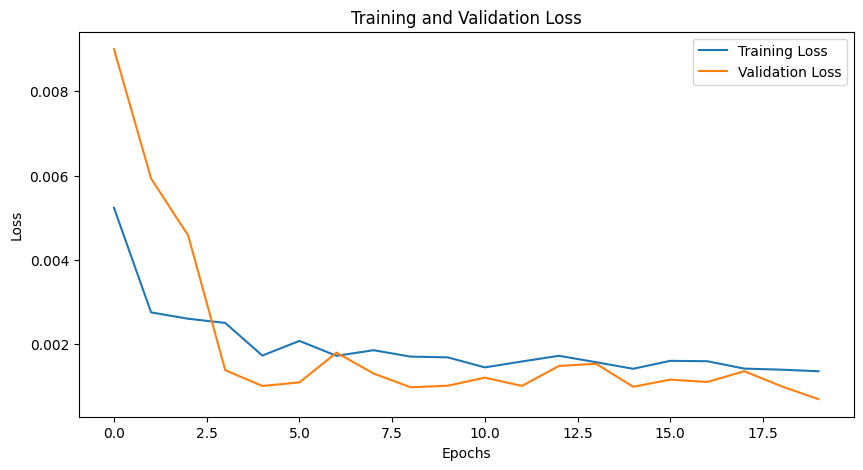

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

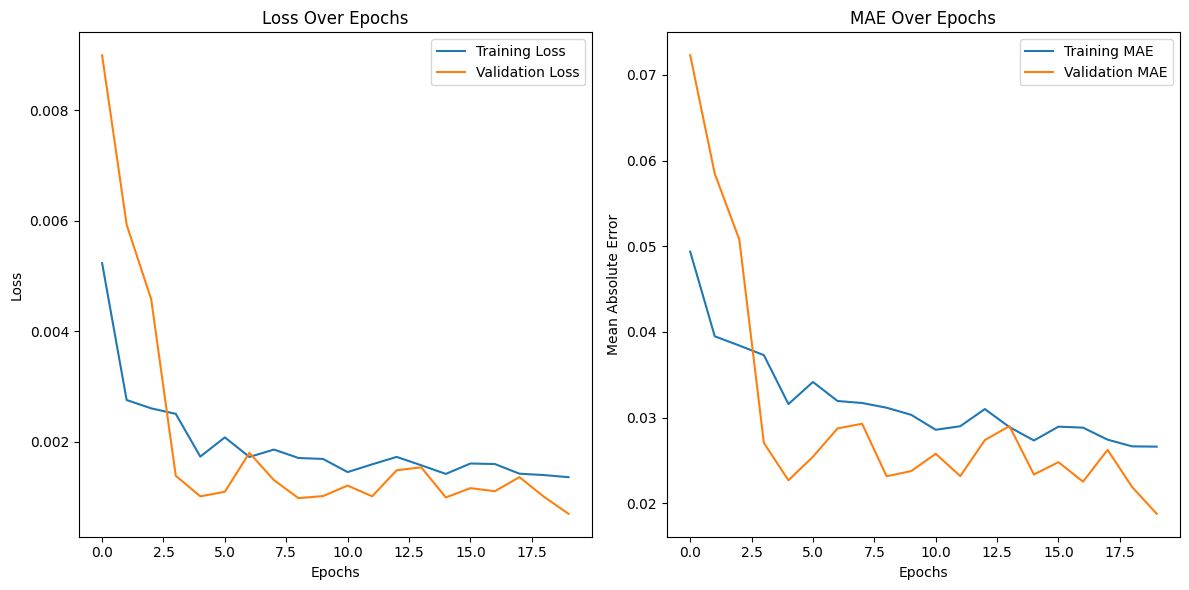

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Over Epochs')

plt.tight_layout()
plt.show()

In [9]:
model.load_weights(checkpoint.filepath)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R-squared (R2)"],
    "Value": [mse, mae, r2]
})

metrics_df

13/13 [==============================] - 0s 2ms/step


,Metric,Value
0,Mean Squared Error (MSE),0.000696
1,Mean Absolute Error (MAE),0.018773
2,R-squared (R2),0.927395


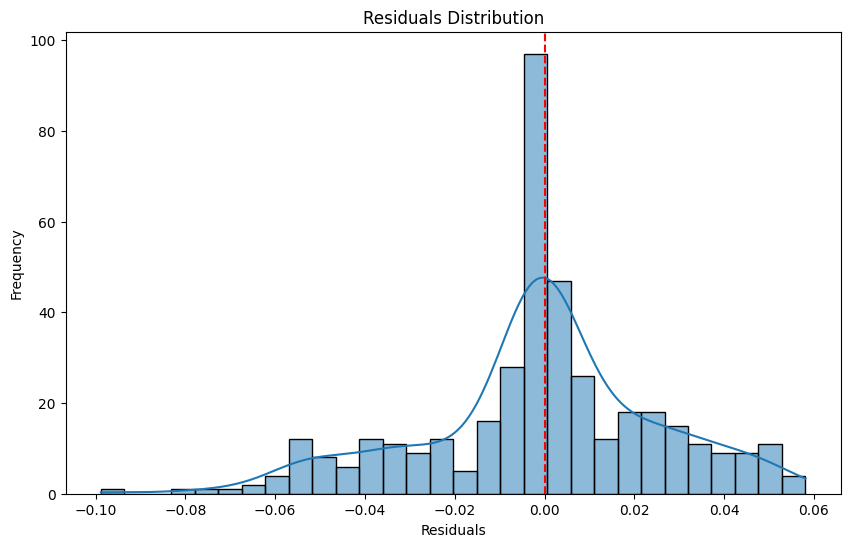

In [10]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

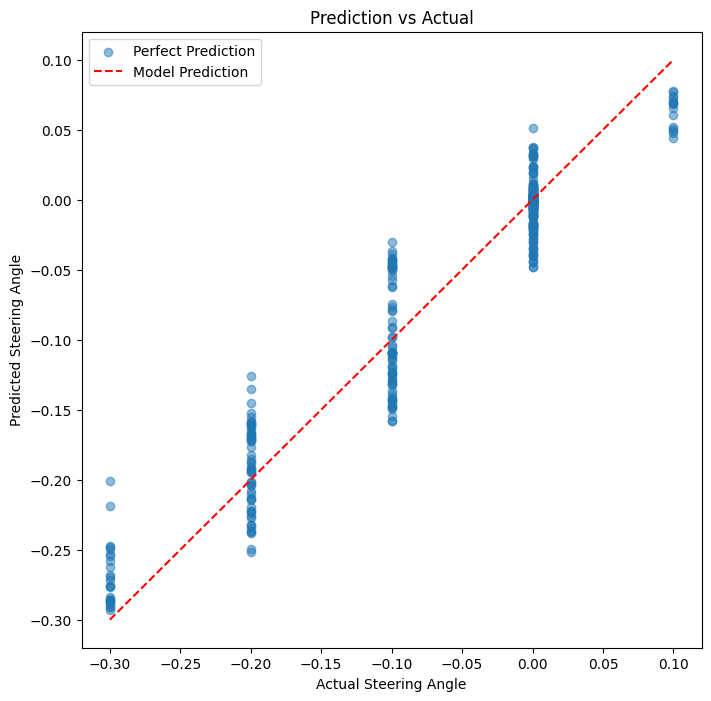

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Steering Angle')
plt.ylabel('Predicted Steering Angle')
plt.title('Prediction vs Actual')
plt.legend(['Perfect Prediction', 'Model Prediction'])
plt.show()

In [12]:
from keras.models import model_from_json

name = 'nn_512_256_128_64'
model_json = model.to_json()
with open(f'../models/{name}.json', 'w') as json_file:
    json.dump(json.loads(model_json), json_file, indent=4)

In [13]:
metadata = {
    "model_name": "nn_512_256_128_64",
    "model_path": f"../models/{name}.json",
    "timestamp": timestamp,
    "input_shape": list(X_train.shape[1:]),
    "output_shape": [1],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": ["mae"],
    "layers": [
        {"type": "BatchNormalization", "input_shape": list(X_train.shape[1:])},
        {"type": "Dense", "units": 512, "activation": "relu"},
        {"type": "Dense", "units": 256, "activation": "relu"},
        {"type": "Dense", "units": 128, "activation": "relu"},
        {"type": "Dense", "units": 64, "activation": "relu"},
        {"type": "Dense", "units": 1}
    ],
    "training": {
        "epochs": len(history.history['loss']),
        "batch_size": 32,
        "best_model_path": checkpoint.filepath,
        "final_training_loss": history.history['loss'][-1],
        "final_validation_loss": history.history['val_loss'][-1]
    },
    "evaluation": {
        "mse": mse,
        "mae": mae,
        "r2": r2
    }
}

try:
    with open("metadata.jsonl", "r+") as f:
        lines = f.readlines()
        if json.dumps(metadata) + "\n" not in lines:
            f.write(json.dumps(metadata) + "\n")
except FileNotFoundError:
    with open("metadata.jsonl", "w") as f:
        f.write(json.dumps(metadata) + "\n")

In [14]:
with open("metadata.jsonl", "r") as f:
    lines = f.readlines()

print(json.dumps(json.loads(lines[-1]), indent=4))

{
    "model_name": "nn_512_256_128_64",
    "model_path": "../models/nn_512_256_128_64.json",
    "timestamp": "20250506_180829",
    "input_shape": [
        18
    ],
    "output_shape": [
        1
    ],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": [
        "mae"
    ],
    "layers": [
        {
            "type": "BatchNormalization",
            "input_shape": [
                18
            ]
        },
        {
            "type": "Dense",
            "units": 512,
            "activation": "relu"
        },
        {
            "type": "Dense",
            "units": 256,
            "activation": "relu"
        },
        {
            "type": "Dense",
            "units": 128,
            "activation": "relu"
        },
        {
            "type": "Dense",
            "units": 64,
            "activation": "relu"
        },
        {
            "type": "Dense",
            "units": 1
      